Problem 13:

D:\Program\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


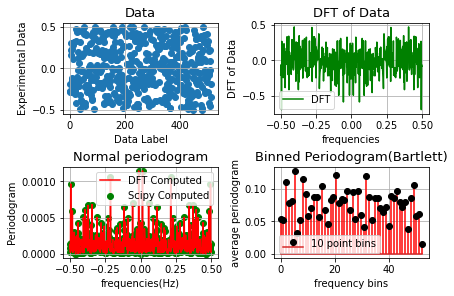

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
data = np.loadtxt("C:/Users/sandesh/Desktop/mayuresh/Tifr sem2/computational/Assignment 3/noise.txt",dtype = np.float64)
x = np.linspace(0.0,len(data),len(data),dtype = np.float64)
# Computing Normal Periodogram
def calc_pow_spec(data,binned = False):
	if(binned == False ):
		k = np.fft.fftshift(np.fft.fftfreq(len(data)))
		dft = np.fft.fftshift(np.fft.fft(data,norm = 'ortho'))
		spec = (1.0/len(data))*np.absolute(dft)**2.0
		return [k,spec]
	else:
		dft = np.fft.fftshift(np.fft.fft(data,norm = 'ortho'))
		val = np.mean(np.absolute(dft)**2.0)
		return val
pow_spec = calc_pow_spec(data)

# performing Accuracy test using Scipy
sci_pow_spec = sps.periodogram(data,scaling = 'spectrum',return_onesided = False)

# Binned Power Spectrum

data_bin = np.zeros(shape = (52,10),dtype = np.float64)
binned_pow_spec = np.zeros(52,dtype = np.float64)

# We took the length as 52 since there are 512 data points
k = 0
for i in range(len(data_bin)):
	for j in range(10):
		data_bin[i][j] = data[k]
		k = k+1
		if(k == len(data)):
			break
for i in range(len(data_bin)):
	binned_pow_spec[i] = calc_pow_spec(data_bin[i],binned = True)

fig = plt.figure(constrained_layout  = True)
spec = fig.add_gridspec(2,2)
d_ft = fig.add_subplot(spec[0,1])
d_ft.set_title("DFT of Data",size = 13)
dft = np.fft.fftshift(np.fft.fft(data,norm = 'ortho'))
k = np.fft.fftshift(np.fft.fftfreq(len(data)))
d_ft.plot(k,dft,color = 'green',label = 'DFT')
d_ft.set_xlabel("frequencies")
d_ft.set_ylabel("DFT of Data")
d_ft.legend()
d_ft.grid()

dat = fig.add_subplot(spec[0,0])
dat.set_title("Data",size = 13)
dat.scatter(x,data)
dat.set_xlabel("Data Label")
dat.set_ylabel("Experimental Data")
dat.grid()

ft = fig.add_subplot(spec[1,0])
ft.set_title("Normal periodogram",size = 13)
ft.plot(pow_spec[0],pow_spec[1],color = 'red',label = 'DFT Computed')
ft.scatter(sci_pow_spec[0],sci_pow_spec[1],color = 'green',label = 'Scipy Computed')
ft.set_xlabel("frequencies(Hz)")
ft.set_ylabel("Periodogram")
ft.legend()
ft.grid()

bin_ft = fig.add_subplot(spec[1,1])
bin_ft.set_title("Binned Periodogram(Bartlett)",size = 13)
bin_ft.stem(np.linspace(0.0,len(binned_pow_spec),len(binned_pow_spec)),binned_pow_spec,markerfmt = ('o','black'),linefmt = ('-','red'),label = "10 point bins")
bin_ft.set_xlabel("frequency bins")
bin_ft.set_ylabel("average periodogram")
bin_ft.legend()
bin_ft.grid()

plt.show()

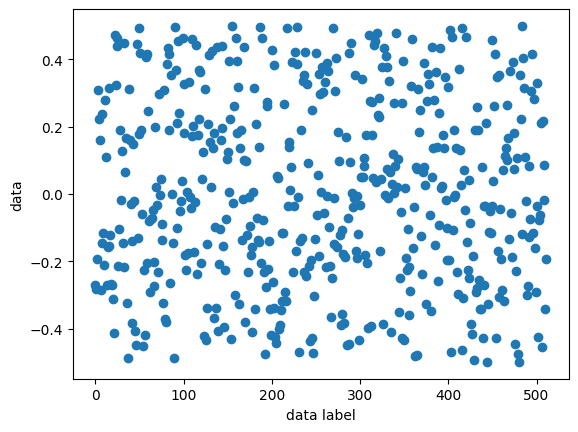

D:\Program\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


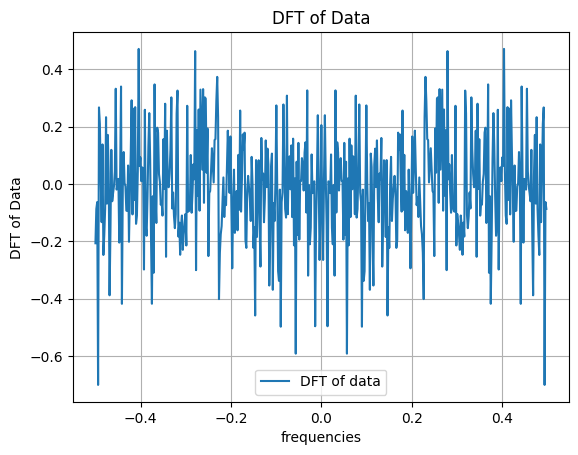

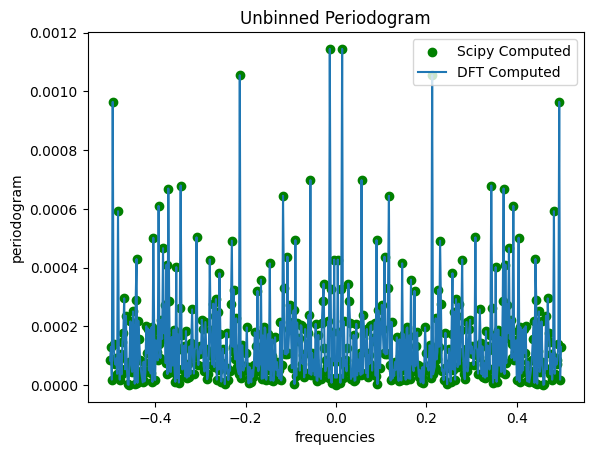

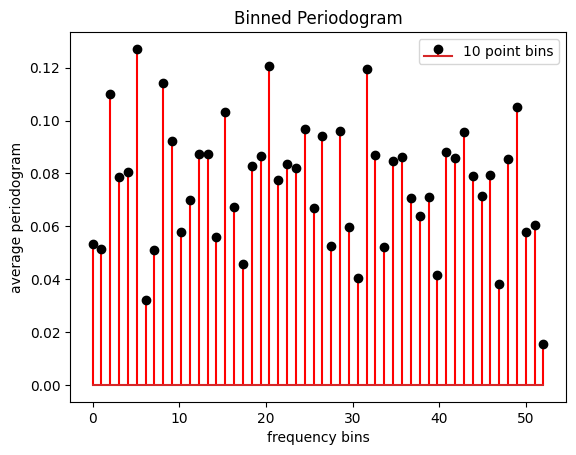

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sps
data = np.loadtxt("C:/Users/sandesh/Desktop/mayuresh/Tifr sem2/computational/Assignment 3/noise.txt",dtype = np.float64)
plt.plot(data,'o')
plt.xlabel('data label')
plt.ylabel('data')
plt.show()
data_dft= np.fft.fftshift(np.fft.fft(data,norm='ortho'))
k = np.fft.fftshift(np.fft.fftfreq(len(data)))

plt.plot(k,data_dft,label='DFT of data')
plt.title("DFT of Data")
plt.xlabel("frequencies")
plt.ylabel("DFT of Data")
plt.legend()
plt.grid()
plt.show()

# Power spectrum using scipy
sci_pow_spec = sps.periodogram(data,scaling = 'spectrum',return_onesided = False)
plt.scatter(sci_pow_spec[0],sci_pow_spec[1],color = 'green',label = 'Scipy Computed')
# Power spectrum using dft
spec = (1.0/len(data))*np.absolute(data_dft)**2.0
plt.plot(k,spec,label = 'DFT Computed')
plt.title('Unbinned Periodogram')
plt.xlabel('frequencies')
plt.ylabel('periodogram')
plt.legend()
plt.show()

def calc_pow_spec(data):
    dft = np.fft.fftshift(np.fft.fft(data,norm = 'ortho'))
    val = np.mean(np.absolute(dft)**2.0)
    return val

data_bin = np.zeros(shape = (52,10),dtype = np.float64)
binned_pow_spec = np.zeros(52,dtype = np.float64)

# We took the length as 52 since there are 512 data points
k = 0
for i in range(len(data_bin)):
    for j in range(10):
        data_bin[i][j] = data[k]
        k = k+1
        if(k == len(data)):
            break
            
for i in range(len(data_bin)):
    binned_pow_spec[i] = calc_pow_spec(data_bin[i])
plt.stem(np.linspace(0.0,len(binned_pow_spec),len(binned_pow_spec)),binned_pow_spec,markerfmt = ('o','black'),linefmt = ('-','red'),label = "10 point bins")
plt.title('Binned Periodogram')
plt.xlabel("frequency bins")
plt.ylabel("average periodogram")
plt.legend()
plt.show()